# House SalePrice Prediction Regression Model

# *1. Python Libraries*

In [2]:
# Import Libraries
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import cpi
import datetime

from datetime import datetime
from joblib import dump, load
from numpy import sqrt, round
from pandas import read_csv
from scipy import stats
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, RidgeCV
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
from sklearn.preprocessing import OrdinalEncoder, PowerTransformer, QuantileTransformer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score
from IPython.display import Image

In [3]:
# Set numpy and pandas display parameter for float number & to set max column display
np.set_printoptions(formatter={'float' : lambda x: "{0:0.4f}".format(x)})
pd.set_option("display.precision", 4)
pd.pandas.set_option("display.max_columns", None)

# Warning message
import warnings
warnings.filterwarnings('ignore')

# Dataset folder path
from pathlib import Path
import sys
import os
path = "C:/Users/rital/python_projects/Hackathons/HousePricePredictionApp"
print(os.listdir(path))

['.vscode', 'app.py', 'app_store', 'dataset', 'Dockerfile', 'jnotebook', 'joutput', 'README.md', 'static', 'templates', 'venv']


# *2. Load Dataset*

In [4]:
train_df = pd.read_csv("C:/Users/rital/python_projects/Hackathons/HousePricePredictionApp/dataset/train.csv")
test_df = pd.read_csv("C:/Users/rital/python_projects/Hackathons/HousePricePredictionApp/dataset/test.csv")

# *3. Dataset Views*

In [5]:
# View Shape and top 5 rows of train dataset
print("Train dataset rows and columns shape", train_df.shape)
train_df.head()

Train dataset rows and columns shape (1460, 81)


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [6]:
# View Shape and top 5 rows of test dataset
print("Test dataset rows and columns shape", test_df.shape)
test_df.head()

Test dataset rows and columns shape (1459, 80)


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4         HLS    AllPub    Inside       Gtl      StoneBr       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            5            6       1961   
1       Norm     1Fam     1Story            6            6       1958   
2       Norm     1Fam     2Story            5            5       1997   
3       Norm     1Fam     2Story            6            6       1998   
4       Norm   TwnhsE     1Story            8            5       1992   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1961     Gable  CompShg     VinylSd     VinylSd        NaN   
1          1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
2          1998     Gable  CompShg     VinylSd     VinylSd        NaN   
3          1998     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4          1992     Gable  CompShg     HdBoard     HdBoard        NaN   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       TA       TA           No   
1       108.0        TA        TA     CBlock       TA       TA           No   
2         0.0        TA        TA      PConc       Gd       TA           No   
3        20.0        TA        TA      PConc       TA       TA           No   
4         0.0        Gd        TA      PConc       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          Rec       468.0          LwQ       144.0      270.0        882.0   
1          ALQ       923.0          Unf         0.0      406.0       1329.0   
2          GLQ       791.0          Unf         0.0      137.0        928.0   
3          GLQ       602.0          Unf         0.0      324.0        926.0   
4          ALQ       263.0          Unf         0.0     1017.0       1280.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       896         0             0   
1    GasA        TA          Y      SBrkr      1329         0             0   
2    GasA        Gd          Y      SBrkr       928       701             0   
3    GasA        Ex          Y      SBrkr       926       678             0   
4    GasA        Ex          Y      SBrkr      1280         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        896           0.0           0.0         1         0             2   
1       1329           0.0           0.0         1         1             3   
2       1629           0.0           0.0         2         1             3   
3       1604           0.0           0.0         2         1             3   
4       1280           0.0           0.0         2         0             2   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           0         NaN   
1             1          Gd             6        Typ           0         NaN   
2             1          TA             6        Typ           1          TA   
3             1          Gd  

# *4. Dataset Information*

In [7]:
# View basic information of train dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
# View basic information of test dataset
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

# *5. Dataset Description*

In [9]:
# View the description of train dataset
train_df.describe().T

count         mean         std      min        25%       50%  \
Id             1460.0     730.5000    421.6100      1.0     365.75     730.5   
MSSubClass     1460.0      56.8973     42.3006     20.0      20.00      50.0   
LotFrontage    1201.0      70.0500     24.2848     21.0      59.00      69.0   
LotArea        1460.0   10516.8281   9981.2649   1300.0    7553.50    9478.5   
OverallQual    1460.0       6.0993      1.3830      1.0       5.00       6.0   
OverallCond    1460.0       5.5753      1.1128      1.0       5.00       5.0   
YearBuilt      1460.0    1971.2678     30.2029   1872.0    1954.00    1973.0   
YearRemodAdd   1460.0    1984.8658     20.6454   1950.0    1967.00    1994.0   
MasVnrArea     1452.0     103.6853    181.0662      0.0       0.00       0.0   
BsmtFinSF1     1460.0     443.6397    456.0981      0.0       0.00     383.5   
BsmtFinSF2     1460.0      46.5493    161.3193      0.0       0.00       0.0   
BsmtUnfSF      1460.0     567.2404    441.8670      0.0     223.00     477.5   
TotalBsmtSF    1460.0    1057.4295    438.7053      0.0     795.75     991.5   
1stFlrSF       1460.0    1162.6267    386.5877    334.0     882.00    1087.0   
2ndFlrSF       1460.0     346.9925    436.5284      0.0       0.00       0.0   
LowQualFinSF   1460.0       5.8445     48.6231      0.0       0.00       0.0   
GrLivArea      1460.0    1515.4637    525.4804    334.0    1129.50    1464.0   
BsmtFullBath   1460.0       0.4253      0.5189      0.0       0.00       0.0   
BsmtHalfBath   1460.0       0.0575      0.2388      0.0       0.00       0.0   
FullBath       1460.0       1.5651      0.5509      0.0       1.00       2.0   
HalfBath       1460.0       0.3829      0.5029      0.0       0.00       0.0   
BedroomAbvGr   1460.0       2.8664      0.8158      0.0       2.00       3.0   
KitchenAbvGr   1460.0       1.0466      0.2203      0.0       1.00       1.0   
TotRmsAbvGrd   1460.0       6.5178      1.6254      2.0       5.00       6.0   
Fireplaces     1460.0       0.6130      0.6447      0.0       0.00       1.0   
GarageYrBlt    1379.0    1978.5062     24.6897   1900.0    1961.00    1980.0   
GarageCars     1460.0       1.7671      0.7473      0.0       1.00       2.0   
GarageArea     1460.0     472.9801    213.8048      0.0     334.50     480.0   
WoodDeckSF     1460.0      94.2445    125.3388      0.0       0.00       0.0   
OpenPorchSF    1460.0      46.6603     66.2560      0.0       0.00      25.0   
EnclosedPorch  1460.0      21.9541     61.1191      0.0       0.00       0.0   
3SsnPorch      1460.0       3.4096     29.3173      0.0       0.00       0.0   
ScreenPorch    1460.0      15.0610     55.7574      0.0       0.00       0.0   
PoolArea       1460.0       2.7589     40.1773      0.0       0.00       0.0   
MiscVal        1460.0      43.4890    496.1230      0.0       0.00       0.0   
MoSold         1460.0       6.3219      2.7036      1.0       5.00       6.0   
YrSold         1460.0    2007.8158      1.3281   2006.0    2007.00    2008.0   
SalePrice      1460.0  180921.1959  79442.5029  34900.0  129975.00  163000.0   

                     75%       max  
Id               1095.25    1460.0  
MSSubClass         70.00     190.0  
LotFrontage        80.00     313.0  
LotArea         11601.50  215245.0  
OverallQual         7.00      10.0  
OverallCond         6.00       9.0  
YearBuilt        2000.00    2010.0  
YearRemodAdd     2004.00    2010.0  
MasVnrArea        166.00    1600.0  
BsmtFinSF1        712.25    5644.0  
BsmtFinSF2          0.00    1474.0  
BsmtUnfSF         808.00    2336.0  
TotalBsmtSF      1298.25    6110.0  
1stFlrSF         1391.25    4692.0  
2ndFlrSF          728.00    2065.0  
LowQualFinSF        0.00     572.0  
GrLivArea        1776.75    5642.0  
BsmtFullBath        1.00       3.0  
BsmtHalfBath        0.00       2.0  
FullBath            2.00       3.0  
HalfBath            1.00       2.0  
BedroomAbvGr        3.00       8.0  
KitchenAbvGr        1.00       3.0  
TotRmsA

In [10]:
# View the description of test dataset
test_df.describe().T

count       mean        std     min      25%     50%  \
Id             1459.0  2190.0000   421.3213  1461.0  1825.50  2190.0   
MSSubClass     1459.0    57.3783    42.7469    20.0    20.00    50.0   
LotFrontage    1232.0    68.5804    22.3768    21.0    58.00    67.0   
LotArea        1459.0  9819.1611  4955.5173  1470.0  7391.00  9399.0   
OverallQual    1459.0     6.0788     1.4368     1.0     5.00     6.0   
OverallCond    1459.0     5.5538     1.1137     1.0     5.00     5.0   
YearBuilt      1459.0  1971.3578    30.3901  1879.0  1953.00  1973.0   
YearRemodAdd   1459.0  1983.6628    21.1305  1950.0  1963.00  1992.0   
MasVnrArea     1444.0   100.7091   177.6259     0.0     0.00     0.0   
BsmtFinSF1     1458.0   439.2037   455.2680     0.0     0.00   350.5   
BsmtFinSF2     1458.0    52.6193   176.7539     0.0     0.00     0.0   
BsmtUnfSF      1458.0   554.2949   437.2605     0.0   219.25   460.0   
TotalBsmtSF    1458.0  1046.1180   442.8986     0.0   784.00   988.0   
1stFlrSF       1459.0  1156.5346   398.1658   407.0   873.50  1079.0   
2ndFlrSF       1459.0   325.9678   420.6102     0.0     0.00     0.0   
LowQualFinSF   1459.0     3.5435    44.0433     0.0     0.00     0.0   
GrLivArea      1459.0  1486.0459   485.5661   407.0  1117.50  1432.0   
BsmtFullBath   1457.0     0.4345     0.5306     0.0     0.00     0.0   
BsmtHalfBath   1457.0     0.0652     0.2525     0.0     0.00     0.0   
FullBath       1459.0     1.5709     0.5552     0.0     1.00     2.0   
HalfBath       1459.0     0.3777     0.5030     0.0     0.00     0.0   
BedroomAbvGr   1459.0     2.8540     0.8298     0.0     2.00     3.0   
KitchenAbvGr   1459.0     1.0425     0.2085     0.0     1.00     1.0   
TotRmsAbvGrd   1459.0     6.3852     1.5089     3.0     5.00     6.0   
Fireplaces     1459.0     0.5812     0.6474     0.0     0.00     0.0   
GarageYrBlt    1381.0  1977.7212    26.4312  1895.0  1959.00  1979.0   
GarageCars     1458.0     1.7661     0.7759     0.0     1.00     2.0   
GarageArea     1458.0   472.7689   217.0486     0.0   318.00   480.0   
WoodDeckSF     1459.0    93.1748   127.7449     0.0     0.00     0.0   
OpenPorchSF    1459.0    48.3139    68.8834     0.0     0.00    28.0   
EnclosedPorch  1459.0    24.2433    67.2278     0.0     0.00     0.0   
3SsnPorch      1459.0     1.7944    20.2078     0.0     0.00     0.0   
ScreenPorch    1459.0    17.0644    56.6098     0.0     0.00     0.0   
PoolArea       1459.0     1.7443    30.4916     0.0     0.00     0.0   
MiscVal        1459.0    58.1679   630.8070     0.0     0.00     0.0   
MoSold         1459.0     6.1042     2.7224     1.0     4.00     6.0   
YrSold         1459.0  2007.7697     1.3017  2006.0  2007.00  2008.0   

                    75%      max  
Id              2554.50   2919.0  
MSSubClass        70.00    190.0  
LotFrontage       80.00    200.0  
LotArea        11517.50  56600.0  
OverallQual        7.00     10.0  
OverallCond        6.00      9.0  
YearBuilt       2001.00   2010.0  
YearRemodAdd    2004.00   2010.0  
MasVnrArea       164.00   1290.0  
BsmtFinSF1       753.50   4010.0  
BsmtFinSF2         0.00   1526.0  
BsmtUnfSF        797.75   2140.0  
TotalBsmtSF     1305.00   5095.0  
1stFlrSF        1382.50   5095.0  
2ndFlrSF         676.00   1862.0  
LowQualFinSF       0.00   1064.0  
GrLivArea       1721.00   5095.0  
BsmtFullBath       1.00      3.0  
BsmtHalfBath       0.00      2.0  
FullBath           2.00      4.0  
HalfBath           1.00      2.0  
BedroomAbvGr       3.00      6.0  
KitchenAbvGr       1.00      2.0  
TotRmsAbvGrd       7.00     15.0  
Fireplaces         1.00      4.0  
GarageYrBlt     2002.00   2207.0  
GarageCars         2.00      5.0  
GarageArea       576.00   1488.0  
WoodDeckSF       168.00   1424.0  
OpenPorchSF       72.00    742.0  
EnclosedPorch      0.00   1012.0  
3SsnPorch          0.00    360.0  
ScreenPorch        0.00    576.0  
PoolArea           0.00    800.0  
MiscVal            0.00  17000.0  
MoSold             

# *6. Dataset Duplicates*

In [11]:
# Find duplicate rows from train/test dataset
print("Train dataset duplicate rows", train_df.duplicated().sum())

print("\n*********************\n")

print("Test dataset duplicate rows", test_df.duplicated().sum())

Train dataset duplicate rows 0

*********************

Test dataset duplicate rows 0


# *7. Dataset Missing Values*

In [12]:
# Train/Test dataset missing % of values
train_nvalues_info = train_df.isnull().sum()*100/len(train_df)
print("Train dataset missing % values :-\n", train_nvalues_info)
train_nvalues_info.to_json("C:/Users/rital/python_projects/Hackathons/HousePricePredictionApp/joutput/jdataset/train_nvalues_info.json")

print("\n***********************************\n")

test_nvalues_info = test_df.isnull().sum()*100/len(test_df)
print("Test dataset missing % values :-\n", test_nvalues_info)
test_nvalues_info.to_json("C:/Users/rital/python_projects/Hackathons/HousePricePredictionApp/joutput/jdataset/test_nvalues_info.json")

Train dataset missing % values :-
 Id                0.0000
MSSubClass        0.0000
MSZoning          0.0000
LotFrontage      17.7397
LotArea           0.0000
                  ...   
MoSold            0.0000
YrSold            0.0000
SaleType          0.0000
SaleCondition     0.0000
SalePrice         0.0000
Length: 81, dtype: float64

***********************************

Test dataset missing % values :-
 Id                0.0000
MSSubClass        0.0000
MSZoning          0.2742
LotFrontage      15.5586
LotArea           0.0000
                  ...   
MiscVal           0.0000
MoSold            0.0000
YrSold            0.0000
SaleType          0.0685
SaleCondition     0.0000
Length: 80, dtype: float64


# *8. Fill the Missing Values of Dataset*

In [13]:
# Find the missing data values columns name in train dataset
print("Train dataset num & cat null columns name :-\n")
train_null_df = [i for i in train_df.columns if train_df[i].isnull().any()]
count = 0
for i in train_null_df:
    count = count + 1
    print(count, "[", i, train_df[i].isnull().sum(), "]")

Train dataset num & cat null columns name :-

1 [ LotFrontage 259 ]
2 [ Alley 1369 ]
3 [ MasVnrType 872 ]
4 [ MasVnrArea 8 ]
5 [ BsmtQual 37 ]
6 [ BsmtCond 37 ]
7 [ BsmtExposure 38 ]
8 [ BsmtFinType1 37 ]
9 [ BsmtFinType2 38 ]
10 [ Electrical 1 ]
11 [ FireplaceQu 690 ]
12 [ GarageType 81 ]
13 [ GarageYrBlt 81 ]
14 [ GarageFinish 81 ]
15 [ GarageQual 81 ]
16 [ GarageCond 81 ]
17 [ PoolQC 1453 ]
18 [ Fence 1179 ]
19 [ MiscFeature 1406 ]


In [14]:
# Find the missing data values columns name in test dataset
print("Test dataset num & cat null columns name :-\n")
test_null_df = [i for i in test_df.columns if test_df[i].isnull().any()]
count = 0
for i in test_null_df:
    count = count + 1
    print(count, "[", i, test_df[i].isnull().sum(), "]")

Test dataset num & cat null columns name :-

1 [ MSZoning 4 ]
2 [ LotFrontage 227 ]
3 [ Alley 1352 ]
4 [ Utilities 2 ]
5 [ Exterior1st 1 ]
6 [ Exterior2nd 1 ]
7 [ MasVnrType 894 ]
8 [ MasVnrArea 15 ]
9 [ BsmtQual 44 ]
10 [ BsmtCond 45 ]
11 [ BsmtExposure 44 ]
12 [ BsmtFinType1 42 ]
13 [ BsmtFinSF1 1 ]
14 [ BsmtFinType2 42 ]
15 [ BsmtFinSF2 1 ]
16 [ BsmtUnfSF 1 ]
17 [ TotalBsmtSF 1 ]
18 [ BsmtFullBath 2 ]
19 [ BsmtHalfBath 2 ]
20 [ KitchenQual 1 ]
21 [ Functional 2 ]
22 [ FireplaceQu 730 ]
23 [ GarageType 76 ]
24 [ GarageYrBlt 78 ]
25 [ GarageFinish 78 ]
26 [ GarageCars 1 ]
27 [ GarageArea 1 ]
28 [ GarageQual 78 ]
29 [ GarageCond 78 ]
30 [ PoolQC 1456 ]
31 [ Fence 1169 ]
32 [ MiscFeature 1408 ]
33 [ SaleType 1 ]


In [15]:
# Fill train dataset num & cat column's values with median number & missing word
train_df[['LotFrontage', 'MasVnrArea', 'GarageYrBlt']] = train_df[['LotFrontage', 'MasVnrArea', 
            'GarageYrBlt']].fillna(train_df[['LotFrontage', 'MasVnrArea', 'GarageYrBlt']].median())

train_df = train_df.fillna("missing")

print("Task completed successfully!")

# Fill test dataset num & cat column's values with median number & missing word
test_df[['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 
            'BsmtHalfBath', 'GarageYrBlt', 'GarageCars', 'GarageArea']] = test_df[['LotFrontage', 'MasVnrArea', 
            'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt', 
            'GarageCars', 'GarageArea']].fillna(test_df[['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 
            'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt', 'GarageCars', 'GarageArea']].median())

test_df = test_df.fillna("missing")

Task completed successfully!


In [16]:
# Verify null values in train/test dataset
train_null_df_1 = [i for i in train_df.columns if train_df[i].isnull().any()]

print("Train dataset null columns name :- ", train_null_df_1)

print("\n*************************************\n")

test_null_df_1 = [i for i in test_df.columns if test_df[i].isnull().any()]

print("Test dataset null columns name :- ", test_null_df_1)

Train dataset null columns name :-  []

*************************************

Test dataset null columns name :-  []


# *9. Dataset Correlations*

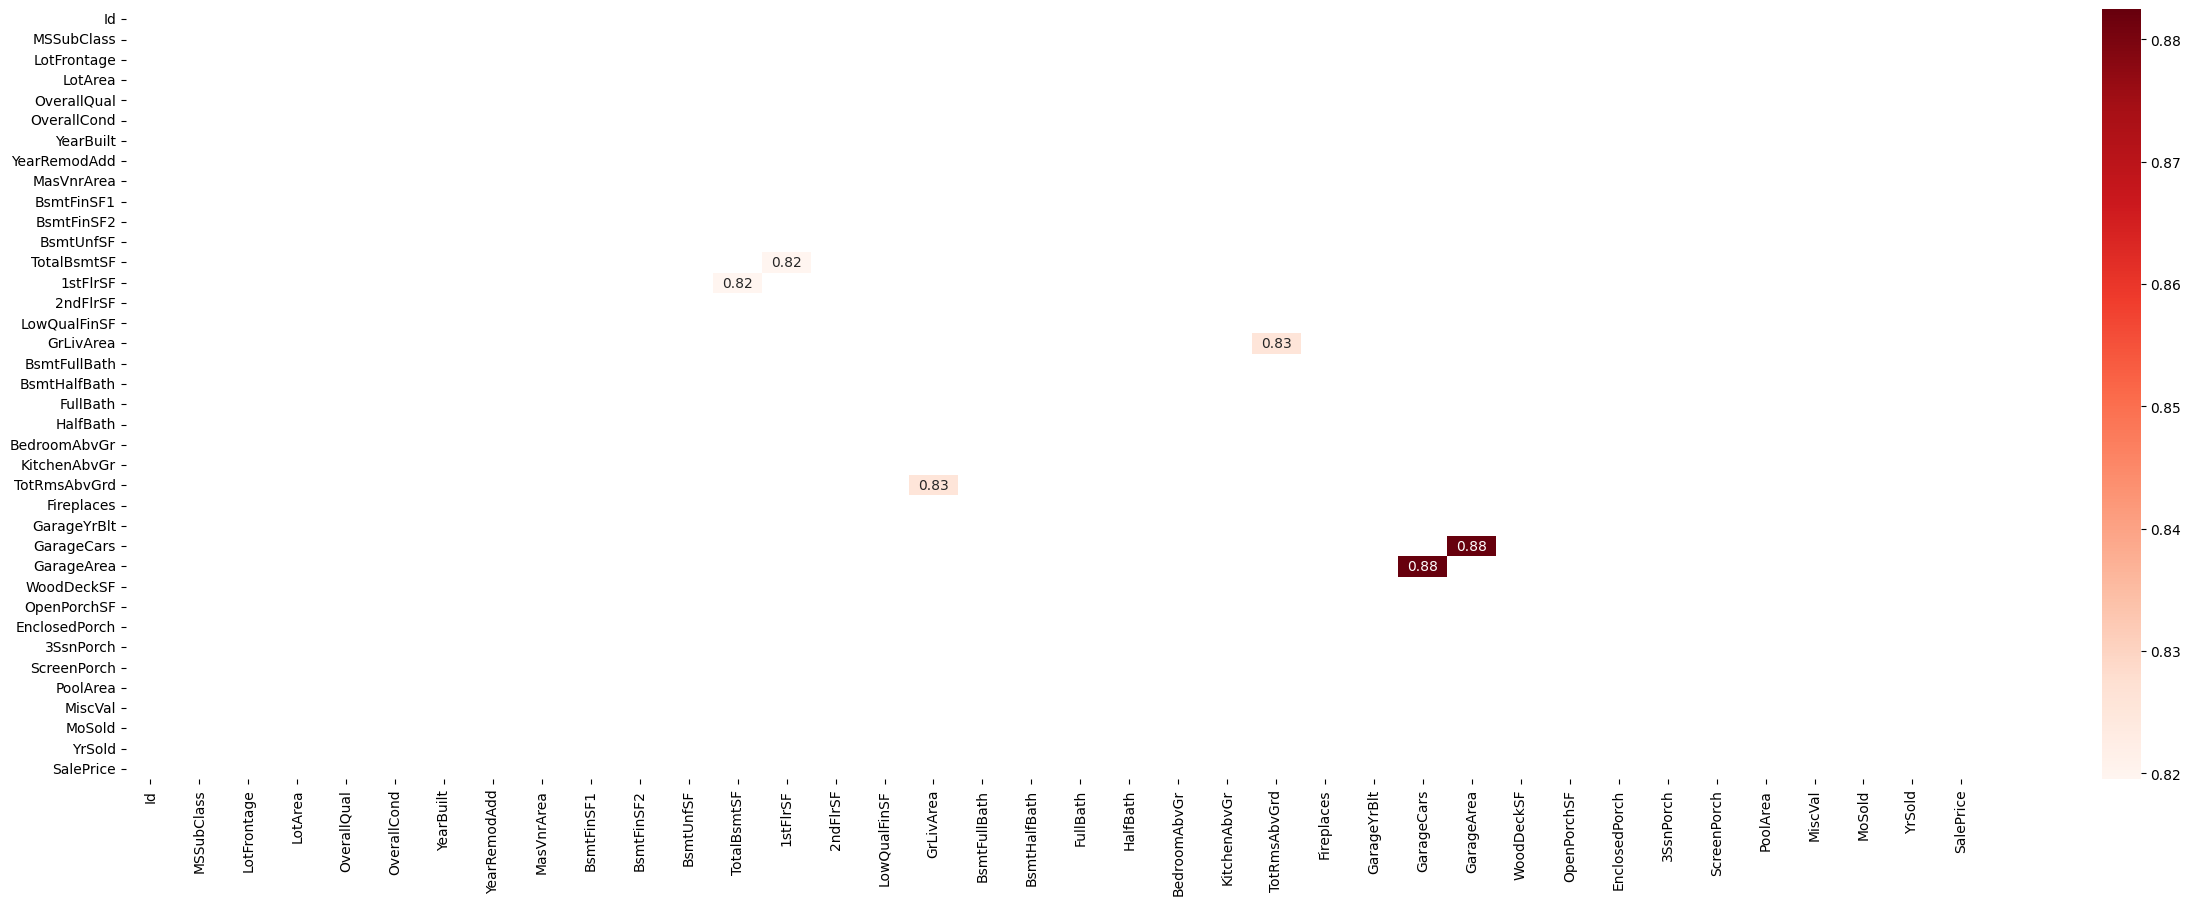

In [17]:
# Find correlation among numerical columns in train dataset
train_corr_matrix = train_df.select_dtypes(include="number").corr().abs()
threshold = 0.8
train_filtered_df = train_corr_matrix[(train_corr_matrix >= threshold) & (train_corr_matrix != 1.000)]
plt.figure(figsize=(30,10))
sns.heatmap(train_filtered_df, annot=True, cmap="Reds")
plt.savefig("C:/Users/rital/python_projects/Hackathons/HousePricePredictionApp/joutput/jimages/train_corr_info.png", format="png")
plt.show()

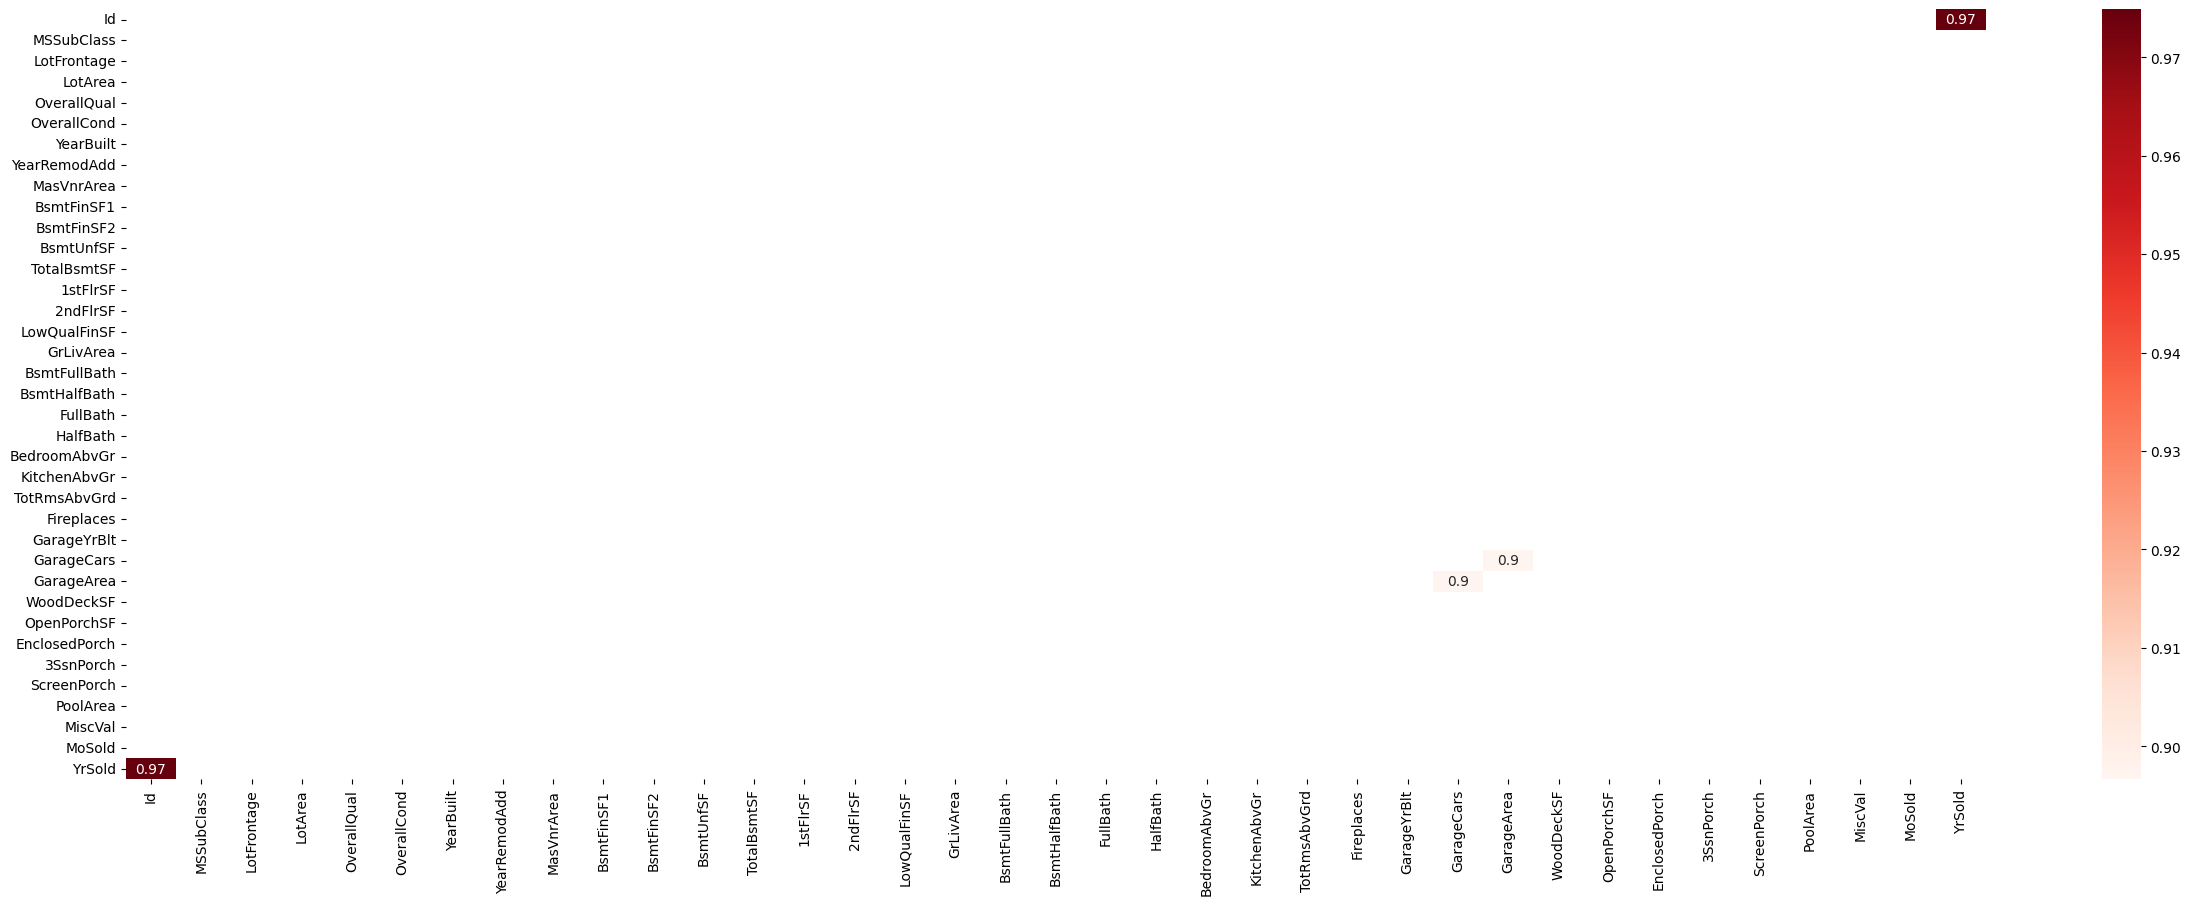

In [18]:
# Find correlation among numerical columns in test dataset
test_corr_matrix = test_df.select_dtypes(include="number").corr().abs()
threshold = 0.8
test_filtered_df = test_corr_matrix[(test_corr_matrix >= threshold) & (test_corr_matrix != 1.000)]
plt.figure(figsize=(30,10))
sns.heatmap(test_filtered_df, annot=True, cmap="Reds")
plt.savefig("C:/Users/rital/python_projects/Hackathons/HousePricePredictionApp/joutput/jimages/test_corr_info.png", format="png")
plt.show()

In [19]:
# Find highly correlated columns name in train\test dataset
train_upper = train_corr_matrix.where(np.triu(np.ones(train_corr_matrix.shape), k=1).astype(bool))
train_corr_info = [column for column in train_upper.columns if any(train_upper[column] > 0.8)]
print("Train dataset correlated columns name :-\n", train_corr_info)

print("**********************************************")

test_upper = test_corr_matrix.where(np.triu(np.ones(test_corr_matrix.shape), k=1).astype(bool))
test_corr_info = [column for column in test_upper.columns if any(test_upper[column] > 0.8)]
print("Test dataset correlated columns name :-\n", test_corr_info)

Train dataset correlated columns name :-
 ['1stFlrSF', 'TotRmsAbvGrd', 'GarageArea']
**********************************************
Test dataset correlated columns name :-
 ['GarageArea', 'YrSold']


# *10. Dataset Outliers*

In [20]:
# Find the numerical columns name in train/test dataset
train_num_df = train_df.select_dtypes(include="number").keys()
print("Train dataset numerical columns shape :-", train_num_df.shape)
print("\nTrain dataset numerical columns name :-", train_num_df)

print("\n*************************************\n")

test_num_df = test_df.select_dtypes(include="number").keys()
print("Test dataset numerical columns shape :-", test_num_df.shape)
print("\nTest dataset numerical columns name :-", test_num_df)

Train dataset numerical columns shape :- (38,)

Train dataset numerical columns name :- Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

*************************************

Test dataset numerical columns shape :- (37,)

Test dataset numerical columns name :- Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalB

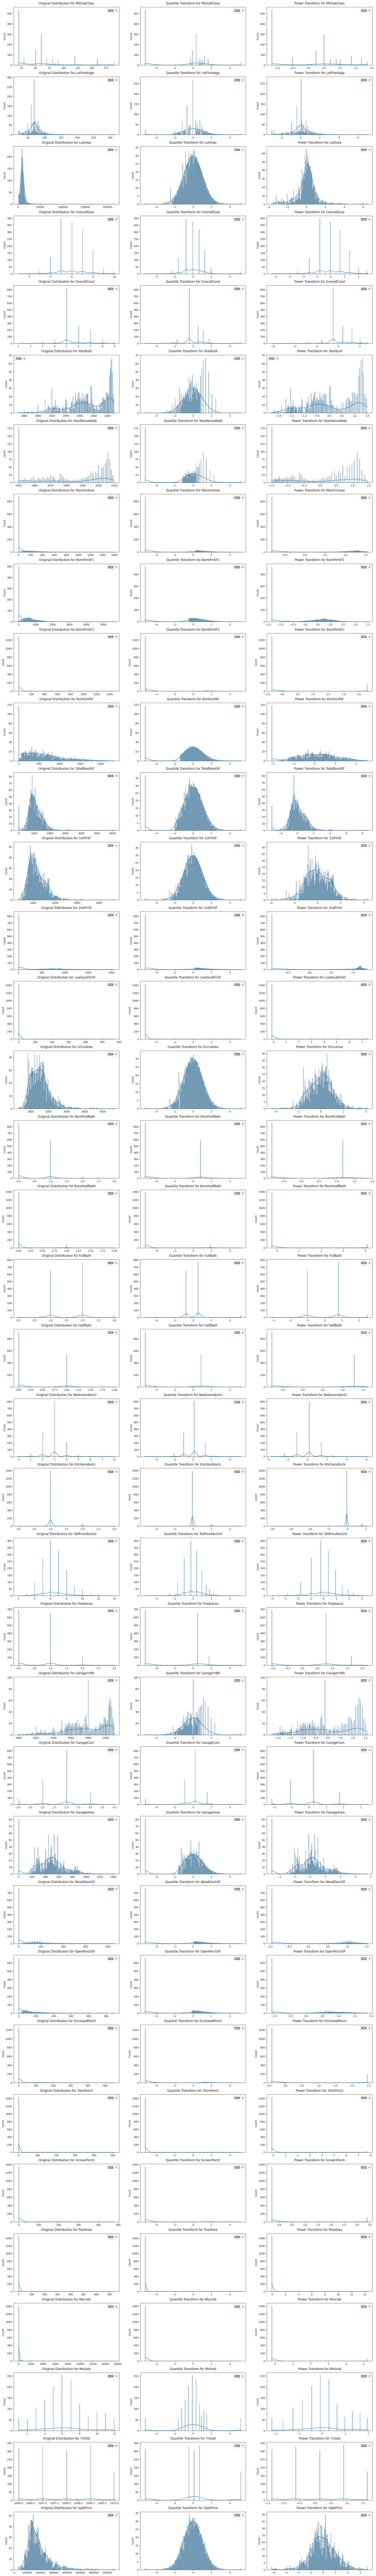

In [21]:
# Find best method to treat outliers in train dataset
cols1 = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
        'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
        'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
        'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
        'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
        'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
        'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
        'MiscVal', 'MoSold', 'YrSold', 'SalePrice']

def test_transformers(columns):
    pt = PowerTransformer()
    qt = QuantileTransformer(n_quantiles=1460, output_distribution='normal')
    fig = plt.figure(figsize=(25, 180))
    j = 1
    for i in columns:
        array = np.array(train_df[i]).reshape(-1, 1)
        y = pt.fit_transform(array)
        x = qt.fit_transform(array)
        plt.subplot(37,3,j)
        sns.histplot(array, bins=200, kde=True)
        plt.title(f"Original Distribution for {i}", y=1.02)
        plt.subplot(37, 3, j+1)
        sns.histplot(x, bins=200, kde=True)
        plt.title(f"Quantile Transform for {i}", y=1.02)
        plt.subplot(37, 3, j+2)
        sns.histplot(y, bins=200, kde=True)
        plt.title(f"Power Transform for {i}", y=1.02)
        j+=3
        plt.savefig("C:/Users/rital/python_projects/Hackathons/HousePricePredictionApp/joutput/jimages/train_outlier_info.png", format="png")


test_transformers(cols1)

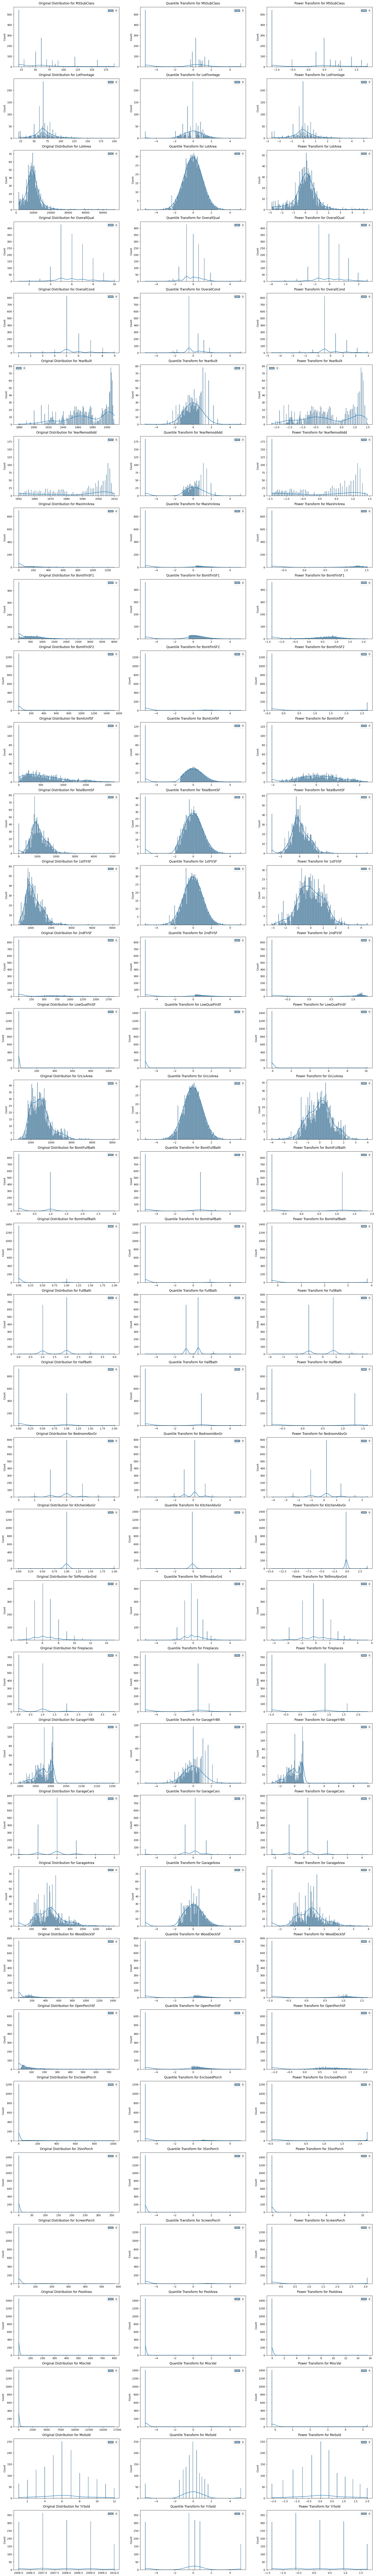

In [22]:
# Find best method to treat outliers in test dataset
cols2 = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
        'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
        'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
        'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
        'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
        'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
        'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
        'MiscVal', 'MoSold', 'YrSold']

def test_transformers(columns):
    pt = PowerTransformer()
    qt = QuantileTransformer(n_quantiles=1459, output_distribution='normal')
    fig = plt.figure(figsize=(25, 180))
    j = 1
    for i in columns:
        array = np.array(test_df[i]).reshape(-1, 1)
        y = pt.fit_transform(array)
        x = qt.fit_transform(array)
        plt.subplot(36,3,j)
        sns.histplot(array, bins=200, kde=True)
        plt.title(f"Original Distribution for {i}", y=1.02)
        plt.subplot(36, 3, j+1)
        sns.histplot(x, bins=200, kde=True)
        plt.title(f"Quantile Transform for {i}", y=1.02)
        plt.subplot(36, 3, j+2)
        sns.histplot(y, bins=200, kde=True)
        plt.title(f"Power Transform for {i}", y=1.02)
        j+=3
        plt.savefig("C:/Users/rital/python_projects/Hackathons/HousePricePredictionApp/joutput/jimages/test_outlier_info.png", format="png")

test_transformers(cols2) 

# *11. Dataset Feature Engineering*

In [23]:
# Train/Test dataset shape
print("Train/Test Dataset Shape :-", train_df.shape, test_df.shape)

Train/Test Dataset Shape :- (1460, 81) (1459, 80)


# (I) Feature Engineering For Numerical Dataset

In [24]:
# Merge Numerical columns in train/test dataset
train_df['HouseAge'] = train_df['YrSold'] - train_df['YearBuilt']
train_df['GarageAge'] = train_df['YrSold'] - train_df['GarageYrBlt']
train_df['RemodAge'] = train_df['YrSold'] - train_df['YearRemodAdd']
train_df['BsmtFinSF'] = train_df['BsmtFinSF1'] + train_df['BsmtFinSF2']
train_df['TotalBsmtBath'] = train_df['BsmtFullBath'] + 0.5 * (train_df['BsmtHalfBath'])
train_df['LivRmsAbvGrd'] = train_df['TotRmsAbvGrd'] - (train_df['BedroomAbvGr'] + train_df['KitchenAbvGr'])
train_df['WDOpnPorch'] = train_df['OpenPorchSF'] + train_df['WoodDeckSF']
train_df['TSSnEncPorch'] = train_df['EnclosedPorch'] + train_df['3SsnPorch'] + train_df['ScreenPorch']
train_df['OverallGrade'] = 0.5 * (train_df['OverallQual']) + 0.5 * (train_df['OverallCond'])


print("Task completed successfully!")

test_df['HouseAge'] = test_df['YrSold'] - test_df['YearBuilt']
test_df['GarageAge'] = test_df['YrSold'] - test_df['GarageYrBlt']
test_df['RemodAge'] = test_df['YrSold'] - test_df['YearRemodAdd']
test_df['BsmtFinSF'] = test_df['BsmtFinSF1'] + test_df['BsmtFinSF2']
test_df['TotalBsmtBath'] = test_df['BsmtFullBath'] + 0.5 * (test_df['BsmtHalfBath'])
test_df['LivRmsAbvGrd'] = test_df['TotRmsAbvGrd'] - (test_df['BedroomAbvGr'] + test_df['KitchenAbvGr'])
test_df['WDOpnPorch'] = test_df['OpenPorchSF'] + test_df['WoodDeckSF']
test_df['TSSnEncPorch'] = test_df['EnclosedPorch'] + test_df['3SsnPorch'] + test_df['ScreenPorch']
test_df['OverallGrade'] = 0.5 * (test_df['OverallQual']) + 0.5 * (test_df['OverallCond'])

Task completed successfully!


In [25]:
# Drop the unnecessary numerical columns from train/test datasets
train_df.drop(['LotFrontage', 'LotArea', 'OverallQual', 'MasVnrArea', 'BsmtFinSF2', 
                '2ndFlrSF', 'BsmtUnfSF', 'BsmtHalfBath', 'Fireplaces', 'GarageCars', 'GarageArea', 
                'WoodDeckSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MoSold', 
                'YrSold', 'YearBuilt', 'GarageYrBlt', 'YearRemodAdd', 'BsmtFullBath', 'TotRmsAbvGrd',
                'BsmtFinSF1', 'OpenPorchSF', 'OverallCond'], axis=1, inplace=True)


test_df.drop(['LotFrontage', 'LotArea', 'OverallQual', 'MasVnrArea', 'BsmtFinSF2', 
                '2ndFlrSF', 'BsmtUnfSF', 'BsmtHalfBath', 'Fireplaces', 'GarageCars', 'GarageArea', 
                'WoodDeckSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MoSold', 
                'YrSold', 'YearBuilt', 'GarageYrBlt', 'YearRemodAdd', 'BsmtFullBath', 'TotRmsAbvGrd', 
                'BsmtFinSF1', 'OpenPorchSF', 'OverallCond'], axis=1, inplace=True)

print("Task completed successfully!")

Task completed successfully!


In [26]:
# Save numerical preprocessed train/test dataset
train_df.to_csv('C:/Users/rital/python_projects/Hackathons/HousePricePredictionApp/joutput/jdataset/train_pp_df.csv', index=False)
test_df.to_csv('C:/Users/rital/python_projects/Hackathons/HousePricePredictionApp/joutput/jdataset/test_pp_df.csv', index=False)

print("Task Completed Successfully!")

Task Completed Successfully!


# (II) Feature Engineering For Categorical Dataset

In [27]:
# Load numerical preprocessed train/test dataset
train_pp_df = pd.read_csv("C:/Users/rital/python_projects/Hackathons/HousePricePredictionApp/joutput/jdataset/train_pp_df.csv")
test_pp_df = pd.read_csv("C:/Users/rital/python_projects/Hackathons/HousePricePredictionApp/joutput/jdataset/test_pp_df.csv")

print("Task completed successfully!")

Task completed successfully!


In [28]:
# Find the categorical columns name in train/test dataset
train_cat_df = train_pp_df.select_dtypes(include="object").keys()
print("Train dataset categorical columns shape :-", train_cat_df.shape)
print("Train dataset categorical columns name :-\n", train_cat_df)

print("\n*******************************************\n")

test_cat_df = test_pp_df.select_dtypes(include="object").keys()
print("Test dataset categorical columns shape :-", test_cat_df.shape)
print("Test dataset categorical columns name :-\n", test_cat_df)

Train dataset categorical columns shape :- (43,)
Train dataset categorical columns name :-
 Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

*******************************************

Test dataset categorical columns shape :- (43,)
Test dataset categorical columns name :-
 Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlop

In [29]:
# Use OrdinalEncoder to convert categorical columns categories into numerical values for train dataset

# Initialize OrdinalEncoder
train_oe = OrdinalEncoder()

# Fit the encoder on the categorical columns
train_pp_df[['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 
              'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 
              'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 
              'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 
              'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
              'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 
              'SaleCondition']] = train_oe.fit_transform(train_pp_df[['MSZoning', 'Street', 'Alley', 'LotShape', 
              'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
              'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 
              'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
              'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 
              'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
              'SaleType', 'SaleCondition']])

print("Task completed successfully!")

Task completed successfully!


In [30]:
# Use OrdinalEncoder to convert categorical columns categories into numerical values for test dataset

# Initialize OrdinalEncoder
test_oe = OrdinalEncoder()

# Fit the encoder on the categorical columns
test_pp_df[['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 
              'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 
              'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 
              'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 
              'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
              'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 
              'SaleCondition']] = test_oe.fit_transform(test_pp_df[['MSZoning', 'Street', 'Alley', 'LotShape', 
              'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
              'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 
              'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
              'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 
              'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 
              'SaleCondition']])

print("Task completed successfully!")

Task completed successfully!


In [31]:
# Merge Categorical columns in train/test dataset
train_pp_df['StreetAlley'] = 0.5 * (train_pp_df['Street']) + 0.5 * (train_pp_df['Alley'])
train_pp_df['LandSlopeContour'] = 0.5 * (train_pp_df['LandSlope']) + 0.5 * (train_pp_df['LandContour'])
train_pp_df['LotCondition'] = 0.5 * (train_pp_df['Condition1']) + 0.5 * (train_pp_df['Condition2'])
train_pp_df['BsmtFinType'] = 0.5 * (train_pp_df['BsmtFinType1']) + 0.5 * (train_pp_df['BsmtFinType2'])
train_pp_df['BsmtGrade'] = 0.5 * (train_pp_df['BsmtQual']) + 0.5 * (train_pp_df['BsmtCond'])
train_pp_df['ExterGrade'] = 0.5 * (train_pp_df['ExterQual']) + 0.5 * (train_pp_df['ExterCond'])

print("Task completed successfully!")

test_pp_df['StreetAlley'] = 0.5 * (test_pp_df['Street']) + 0.5 * (test_pp_df['Alley'])
test_pp_df['LandSlopeContour'] = 0.5 * (test_pp_df['LandSlope']) + 0.5 * (test_pp_df['LandContour'])
test_pp_df['LotCondition'] = 0.5 * (test_pp_df['Condition1']) + 0.5 * (test_pp_df['Condition2'])
test_pp_df['BsmtFinType'] = 0.5 * (test_pp_df['BsmtFinType1']) + 0.5 * (test_pp_df['BsmtFinType2'])
test_pp_df['BsmtGrade'] = 0.5 * (test_pp_df['BsmtQual']) + 0.5 * (test_pp_df['BsmtCond'])
test_pp_df['ExterGrade'] = 0.5 * (test_pp_df['ExterQual']) + 0.5 * (test_pp_df['ExterCond'])

Task completed successfully!


In [32]:
# Drop the unnecessary categorical columns from train/test datasets
train_pp_df.drop(['LandSlope', 'Condition1', 'BsmtFinType2','Street', 'Alley', 'LandContour', 'Condition2', 
                'BsmtFinType1', 'BsmtQual', 'BsmtCond', 'ExterQual', 'ExterCond', 'PoolQC', 'MiscFeature'], axis=1, inplace=True)

print("Task completed successfully!")

test_pp_df.drop(['LandSlope', 'Condition1', 'BsmtFinType2','Street', 'Alley', 'LandContour', 'Condition2', 
                'BsmtFinType1', 'BsmtQual', 'BsmtCond', 'ExterQual', 'ExterCond', 'PoolQC', 'MiscFeature'], axis=1, inplace=True)

Task completed successfully!


In [33]:
# Save categorical preprocessed train/test dataset
train_pp_df.to_csv('C:/Users/rital/python_projects/Hackathons/HousePricePredictionApp/joutput/jdataset/train_clean_df.csv', index=False)
test_pp_df.to_csv('C:/Users/rital/python_projects/Hackathons/HousePricePredictionApp/joutput/jdataset/test_clean_df.csv', index=False)

print("Task Completed Successfully!")

Task Completed Successfully!


In [34]:
# Cleaned train dataset shape and top 5 rows
print("Cleaned train dataset shape :-", train_pp_df.shape)
train_pp_df.head()

Cleaned train dataset shape :- (1460, 56)


Id  MSSubClass  MSZoning  LotShape  Utilities  LotConfig  Neighborhood  \
0   1          60       3.0       3.0        0.0        4.0           5.0   
1   2          20       3.0       3.0        0.0        2.0          24.0   
2   3          60       3.0       0.0        0.0        4.0           5.0   
3   4          70       3.0       0.0        0.0        0.0           6.0   
4   5          60       3.0       0.0        0.0        2.0          15.0   

   BldgType  HouseStyle  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  \
0       0.0         5.0        1.0       1.0         12.0         13.0   
1       0.0         2.0        1.0       1.0          8.0          8.0   
2       0.0         5.0        1.0       1.0         12.0         13.0   
3       0.0         5.0        1.0       1.0         13.0         15.0   
4       0.0         5.0        1.0       1.0         12.0         13.0   

   MasVnrType  Foundation  BsmtExposure  TotalBsmtSF  Heating  HeatingQC  \
0         1.0         2.0           3.0          856      1.0        0.0   
1         3.0         1.0           1.0         1262      1.0        0.0   
2         1.0         2.0           2.0          920      1.0        0.0   
3         3.0         0.0           3.0          756      1.0        2.0   
4         1.0         2.0           0.0         1145      1.0        0.0   

   CentralAir  Electrical  1stFlrSF  LowQualFinSF  GrLivArea  FullBath  \
0         1.0         4.0       856             0       1710         2   
1         1.0         4.0      1262             0       1262         2   
2         1.0         4.0       920             0       1786         2   
3         1.0         4.0       961             0       1717         1   
4         1.0         4.0      1145             0       2198         2   

   HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  Functional  FireplaceQu  \
0         1             3             1          2.0         6.0          5.0   
1         0             3             1          3.0         6.0          4.0   
2         1             3             1          2.0         6.0          4.0   
3         0             3             1          2.0         6.0          2.0   
4         1             4             1          2.0         6.0          4.0   

   GarageType  GarageFinish  GarageQual  GarageCond  PavedDrive  Fence  \
0         1.0           1.0         4.0         4.0         2.0    4.0   
1         1.0           1.0         4.0         4.0         2.0    4.0   
2         1.0           1.0         4.0         4.0         2.0    4.0   
3         5.0           2.0         4.0         4.0         2.0    4.0   
4         1.0           1.0         4.0         4.0         2.0    4.0   

   MiscVal  SaleType  SaleCondition  SalePrice  HouseAge  GarageAge  RemodAge  \
0        0       8.0            4.0     208500         5        5.0         5   
1        0       8.0            4.0     181500        31       31.0        31   
2        0       8.0            4.0     223500         7        7.0         6   
3        0       8.0            0.0     140000        91        8.0        36   
4        0       8.0            4.0     250000         8        8.0         8   

   BsmtFinSF  TotalBsmtBath  LivRmsAbvGrd  WDOpnPorch  TSSnEncPorch  \
0        706            1.0             4          61             0   
1        978            0.5             2         298             0   
2        486            1.0             2          42             0   
3        216            1.0             3          35           272   
4        655            1.0             4         276             0   

   OverallGrade  StreetAlley  LandSlopeContour  LotCondition  BsmtFinType  \
0           6.0          1.5               1.5           2.0          3.5   
1           7.0          1.5               1.5           1.5          2.5   
2           6.0          1.5               1.5           2.0          3.5   
3           6.0          1.5           

In [35]:
# Cleaned test dataset shape and top 5 rows
print("Cleaned test dataset shape :-", test_pp_df.shape)
test_pp_df.head()

Cleaned test dataset shape :- (1459, 55)


Id  MSSubClass  MSZoning  LotShape  Utilities  LotConfig  Neighborhood  \
0  1461          20       2.0       3.0        0.0        4.0          12.0   
1  1462          20       3.0       0.0        0.0        0.0          12.0   
2  1463          60       3.0       0.0        0.0        4.0           8.0   
3  1464          60       3.0       0.0        0.0        4.0           8.0   
4  1465         120       3.0       0.0        0.0        4.0          22.0   

   BldgType  HouseStyle  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  \
0       0.0         2.0        1.0       0.0         10.0         12.0   
1       0.0         2.0        3.0       0.0         11.0         13.0   
2       0.0         4.0        1.0       0.0         10.0         12.0   
3       0.0         4.0        1.0       0.0         10.0         12.0   
4       4.0         2.0        1.0       0.0          6.0          6.0   

   MasVnrType  Foundation  BsmtExposure  TotalBsmtSF  Heating  HeatingQC  \
0         3.0         1.0           3.0        882.0      0.0        4.0   
1         1.0         1.0           3.0       1329.0      0.0        4.0   
2         3.0         2.0           3.0        928.0      0.0        2.0   
3         1.0         2.0           3.0        926.0      0.0        0.0   
4         3.0         2.0           3.0       1280.0      0.0        0.0   

   CentralAir  Electrical  1stFlrSF  LowQualFinSF  GrLivArea  FullBath  \
0         1.0         3.0       896             0        896         1   
1         1.0         3.0      1329             0       1329         1   
2         1.0         3.0       928             0       1629         2   
3         1.0         3.0       926             0       1604         2   
4         1.0         3.0      1280             0       1280         2   

   HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  Functional  FireplaceQu  \
0         0             2             1          3.0         6.0          5.0   
1         1             3             1          2.0         6.0          5.0   
2         1             3             1          3.0         6.0          4.0   
3         1             3             1          2.0         6.0          2.0   
4         0             2             1          2.0         6.0          5.0   

   GarageType  GarageFinish  GarageQual  GarageCond  PavedDrive  Fence  \
0         1.0           2.0         3.0         4.0         2.0    2.0   
1         1.0           2.0         3.0         4.0         2.0    4.0   
2         1.0           0.0         3.0         4.0         2.0    2.0   
3         1.0           0.0         3.0         4.0         2.0    4.0   
4         1.0           1.0         3.0         4.0         2.0    4.0   

   MiscVal  SaleType  SaleCondition  HouseAge  GarageAge  RemodAge  BsmtFinSF  \
0        0       8.0            4.0        49       49.0        49      612.0   
1    12500       8.0            4.0        52       52.0        52      923.0   
2        0       8.0            4.0        13       13.0        12      791.0   
3        0       8.0            4.0        12       12.0        12      602.0   
4        0       8.0            4.0        18       18.0        18      263.0   

   TotalBsmtBath  LivRmsAbvGrd  WDOpnPorch  TSSnEncPorch  OverallGrade  \
0            0.0             2         140           120           5.5   
1            0.0             2         429             0           6.0   
2            0.0             2         246             0           5.0   
3            0.0             3         396             0           6.0   
4            0.0             2          82           144           6.5   

   StreetAlley  LandSlopeContour  LotCondition  BsmtFinType  BsmtGrade  \
0          1.5               1.5           1.5          3.5        3.0   
1          1.5               1.5           2.0          2.5        3.0   
2          1.5               1.5           2.0          3.5        2.5   
3          1.5         

# *12. Regression Model Building*

# (I) Train/Test/Split

In [36]:
# Load preprocessed
train_clean_df = pd.read_csv("C:/Users/rital/python_projects/Hackathons/HousePricePredictionApp/joutput/jdataset/train_clean_df.csv")
test_clean_df = pd.read_csv("C:/Users/rital/python_projects/Hackathons/HousePricePredictionApp/joutput/jdataset/test_clean_df.csv")

print("Task completed successfully!")

Task completed successfully!


In [37]:
# Identify the target columns
train_drop_target = ['Id', 'SalePrice']
test_drop_target = ['Id']
target = ['SalePrice']

# Train_Test_Split
X_train = train_clean_df.drop(["Id", "SalePrice"], axis=1)
X_test  = test_clean_df.drop("Id", axis=1)
Y_train = train_clean_df["SalePrice"]

print("Task completed successfully!")

Task completed successfully!


In [38]:
# Y_test to match with X_test count
train_dummy_df = train_clean_df.copy()
values = [496]
train_dummy_df = train_dummy_df[train_dummy_df.Id.isin(values) == False]

Y_test = train_dummy_df["SalePrice"]

print("Task completed successfully!")

Task completed successfully!


In [39]:
# Train/Test dataset shape
print("Train dataset shape :-", X_train.shape, Y_train.shape)
print("Test dataset shape :-", X_test.shape, Y_test.shape)

Train dataset shape :- (1460, 54) (1460,)
Test dataset shape :- (1459, 54) (1459,)


# (II) Scale X_train/X_test Dataset

In [40]:
# Scale X_train/X_test with a QuantileTransformer to normalize dataset
quantile = QuantileTransformer(output_distribution='normal')
X_train = quantile.fit_transform(X_train)
X_test = quantile.transform(X_test)

print("X_train array :-", X_train)
print("\n********************\n")
print("X_test array :-", X_test)

X_train array :- [[0.3216 -0.1094 5.1993 ... -0.1689 -0.3375 -0.4822]
 [-5.1993 -0.1094 5.1993 ... -1.0865 -0.3375 5.1993]
 [0.3216 -0.1094 -5.1993 ... -0.1689 -0.3375 -0.4822]
 ...
 [0.6721 -0.1094 5.1993 ... -0.1689 -1.0188 -2.6965]
 [-5.1993 -0.1094 5.1993 ... -0.6690 0.7414 5.1993]
 [-5.1993 -0.1094 5.1993 ... -1.6253 0.7414 -0.4822]]

********************

X_test array :- [[-5.1993 -1.5844 5.1993 ... -0.1689 0.7414 5.1993]
 [-5.1993 -0.1094 -5.1993 ... -1.0865 0.7414 5.1993]
 [0.3216 -0.1094 -5.1993 ... -0.1689 -0.3375 5.1993]
 ...
 [-5.1993 -0.1094 5.1993 ... -1.0865 0.7414 5.1993]
 [0.9456 -0.1094 5.1993 ... -0.1689 -0.3375 5.1993]
 [0.3216 -0.1094 5.1993 ... 0.2239 -0.3375 5.1993]]


# (III) Model Training

# *(A) Linear Regression Model*

In [41]:
# Train_Test_Split
X_train, X_test, Y_train, Y_test

# Linear Regression Model
lr_model = LinearRegression()

# Fit the model
lr_trained_model = lr_model.fit(X_train, Y_train)

# Test dataset prediction
lr_test_pred = lr_trained_model.predict(X_test)

# Find training/testing score
lr_train_accuracy = round(lr_trained_model.score(X_train, Y_train) * 100, 2)
print("The Accuracy of the trained model is:-", lr_train_accuracy)

# Metric Result
lr_mse = mean_squared_error(Y_test, lr_test_pred)
print("The MSE of the model is:-", lr_mse)

lr_rmse = sqrt(mean_squared_error(Y_test, lr_test_pred))
print("The RMSE of the model is:-", lr_rmse)

lr_mae = mean_absolute_error(Y_test, lr_test_pred)
print("The MAE of the model is:-", lr_mae)

lr_r2 = r2_score(Y_test, lr_test_pred)
print("The R2 of the model is:-", lr_r2)

The Accuracy of the trained model is:- 82.08
The MSE of the model is:- 18836829221.24501
The RMSE of the model is:- 137247.32864884843
The MAE of the model is:- 109367.6031024461
The R2 of the model is:- -1.9916410890608667


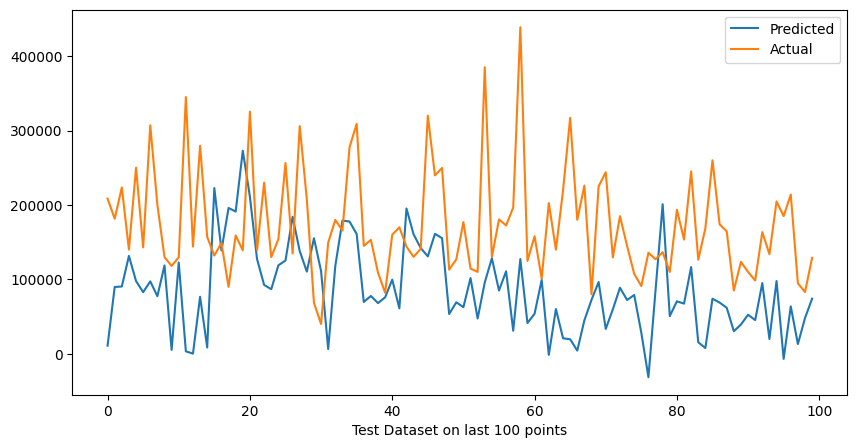

In [42]:
# Actual/Predicted on test data
plt.figure(figsize=(10,5))
plt.plot((lr_test_pred)[:100])
plt.plot((Y_test)[:100])
plt.legend(["Predicted", "Actual"])
plt.xlabel('Test Dataset on last 100 points')
plt.show()

# *(B) Ridge Regression Model*

In [43]:
# Train_Test_Split
X_train, X_test, Y_train, Y_test

# Ridge Regression Model
rr_model = RidgeCV(alphas=[0.2, 10.0, 100.0], cv=5)

# Fit the model
rr_trained_model = rr_model.fit(X_train, Y_train)

# Test dataset prediction
rr_test_pred = rr_trained_model.predict(X_test)

# Find training score
rr_accuracy = round(rr_trained_model.score(X_train, Y_train) * 100, 2)
print("The Accuracy of the trained model is:-", rr_accuracy)

# Metric Result
rr_mse = mean_squared_error(Y_test, rr_test_pred)
print("The MSE of the model is:-", rr_mse)

rr_rmse = sqrt(mean_squared_error(Y_test, rr_test_pred))
print("The RMSE of the model is:-", rr_rmse)

rr_mae = mean_absolute_error(Y_test, rr_test_pred)
print("The MAE of the model is:-", rr_mae)

rr_r2 = r2_score(Y_test, rr_test_pred)
print("The R2 of the model is:-", rr_r2)

The Accuracy of the trained model is:- 81.89
The MSE of the model is:- 15437811870.95745
The RMSE of the model is:- 124248.99142833092
The MAE of the model is:- 96785.4409371536
The R2 of the model is:- -1.4518135072467042


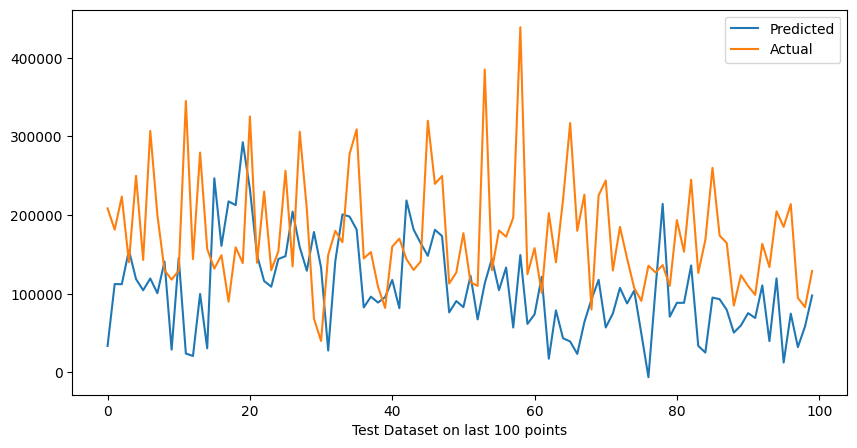

In [44]:
# Actual/Predicted on test data
plt.figure(figsize=(10,5))
plt.plot((rr_test_pred)[:100])
plt.plot((Y_test)[:100])
plt.legend(["Predicted", "Actual"])
plt.xlabel('Test Dataset on last 100 points')
plt.show()

# *(C) Support Vector Regression Model*

In [45]:
# Train_Test_Split
X_train, X_test, Y_train, Y_test

# SVM Regression Model
svmr_model = SVR(kernel='linear', C=1000)

# Fit the model
svmr_trained_model = svmr_model.fit(X_train, Y_train)

# Test dataset prediction
svmr_test_pred = svmr_trained_model.predict(X_test)

# Find training score
svmr_accuracy = round(svmr_trained_model.score(X_train, Y_train) * 100, 2)
print("The Accuracy of the trained model is:-", svmr_accuracy)

# Metric Result
svmr_mse = mean_squared_error(Y_test, svmr_test_pred)
print("The MSE of the model is:-", svmr_mse)

svmr_rmse = sqrt(mean_squared_error(Y_test, svmr_test_pred))
print("The RMSE of the model is:-", lr_rmse)

svmr_mae = mean_absolute_error(Y_test, svmr_test_pred)
print("The MAE of the model is:-", lr_mae)

svmr_r2 = r2_score(Y_test, svmr_test_pred)
print("The R2 of the model is:-", lr_r2)

The Accuracy of the trained model is:- 79.42
The MSE of the model is:- 11757924624.97032
The RMSE of the model is:- 137247.32864884843
The MAE of the model is:- 109367.6031024461
The R2 of the model is:- -1.9916410890608667


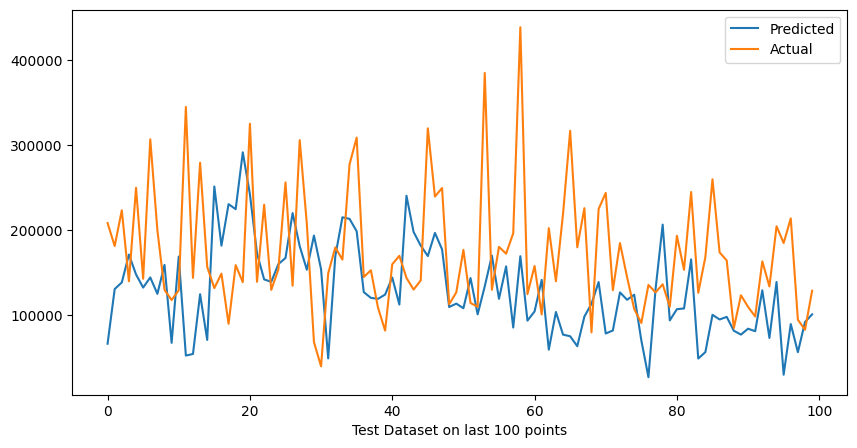

In [46]:
# Actual/Predicted on test data
plt.figure(figsize=(10,5))
plt.plot((svmr_test_pred)[:100])
plt.plot((Y_test)[:100])
plt.legend(["Predicted", "Actual"])
plt.xlabel('Test Dataset on last 100 points')
plt.show()

# *(D) Logistic Regression Model*

In [47]:
# Train_Test_Split
X_train, X_test, Y_train, Y_test

# Linear Regression Model
logreg_model = LogisticRegression(max_iter=20, random_state=42)

# Fit the model
logreg_trained_model = logreg_model.fit(X_train, Y_train)

# Test dataset prediction
logreg_test_pred = logreg_trained_model.predict(X_test)

# Find training score
logreg_accuracy = round(logreg_trained_model.score(X_test, Y_test) * 100, 2)
print("The Accuracy of the trained model is:-", logreg_accuracy)

# Metric Result
logreg_mse = mean_squared_error(Y_test, logreg_test_pred)
print("The MSE of the model is:-", lr_mse)

logreg_rmse = sqrt(mean_squared_error(Y_test, logreg_test_pred))
print("The RMSE of the model is:-", logreg_rmse)

logreg_mae = mean_absolute_error(Y_test, logreg_test_pred)
print("The MAE of the model is:-", logreg_mae)

logreg_r2 = r2_score(Y_test, logreg_test_pred)
print("The R2 of the model is:-", logreg_r2)

The Accuracy of the trained model is:- 0.34
The MSE of the model is:- 18836829221.24501
The RMSE of the model is:- 101931.3208961975
The MAE of the model is:- 74496.25222755312
The R2 of the model is:- -0.6501255671983313


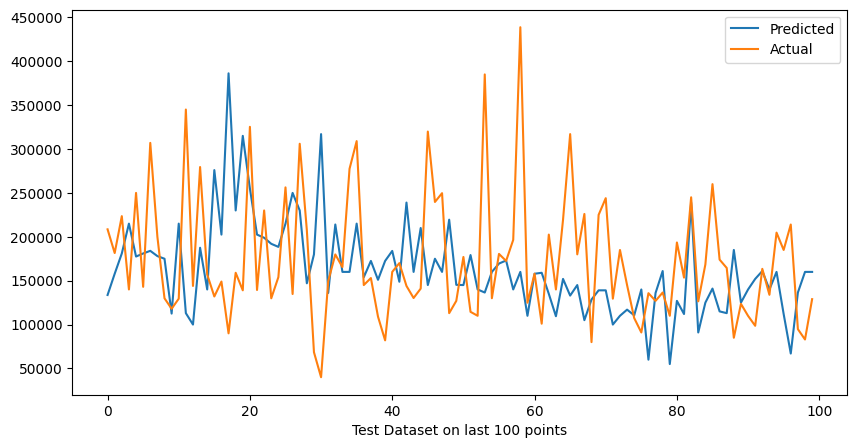

In [48]:
# Actual/Predicted on test data
plt.figure(figsize=(10,5))
plt.plot((logreg_test_pred)[:100])
plt.plot((Y_test)[:100])
plt.legend(["Predicted", "Actual"])
plt.xlabel('Test Dataset on last 100 points')
plt.show()

# *(E) Xtreme Gradient Boosting Regression Model*

In [49]:
# Train_Test_Split
X_train, X_test, Y_train, Y_test

# Light GBM Regressor Model
xgbr_model = XGBRegressor(max_depth= 10, 
                        min_samples_leaf=3, 
                        min_samples_split=5, 
                        n_estimators=100)

# Fit the model
xgbrcv_trained_model = xgbr_model.fit(X_train, Y_train)

# Test dataset prediction
xgbrcv_test_pred = xgbrcv_trained_model.predict(X_test)

# Find training score
xgbrcv_accuracy = round(xgbrcv_trained_model.score(X_train, Y_train) * 100, 2)
print("The Accuracy of the trained model is:-", xgbrcv_accuracy)

# Metric Result
xgbrcv_mse = mean_squared_error(Y_test, xgbrcv_test_pred)
print("The MSE of the model is:-", xgbrcv_mse)

xgbrcv_rmse = sqrt(mean_squared_error(Y_test, xgbrcv_test_pred))
print("The RMSE of the model is:-", xgbrcv_rmse)

xgbrcv_mae = mean_absolute_error(Y_test, xgbrcv_test_pred)
print("The MAE of the model is:-", xgbrcv_mae)

xgbrcv_r2 = r2_score(Y_test, xgbrcv_test_pred)
print("The R2 of the model is:-", xgbrcv_r2)

The Accuracy of the trained model is:- 100.0
The MSE of the model is:- 11655702528.0
The RMSE of the model is:- 107961.57894362234
The MAE of the model is:- 78952.3203125
The R2 of the model is:- -0.8511438369750977


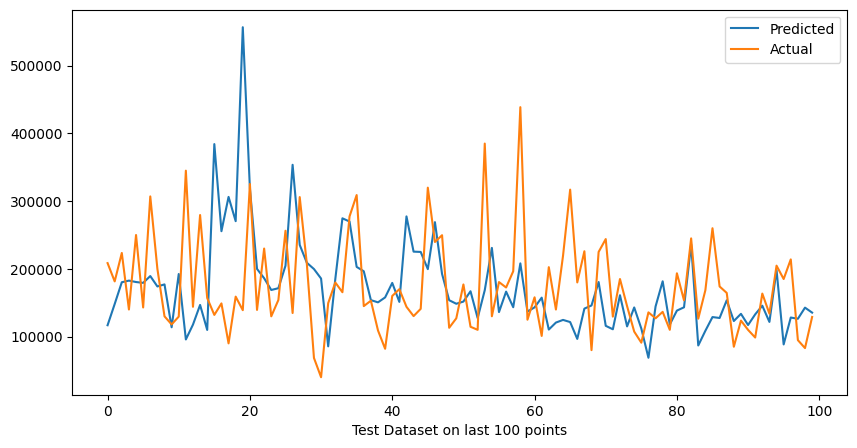

In [50]:
# Actual/Predicted on test data
plt.figure(figsize=(10,5))
plt.plot((xgbrcv_test_pred)[:100])
plt.plot((Y_test)[:100])
plt.legend(["Predicted", "Actual"])
plt.xlabel('Test Dataset on last 100 points')
plt.show()

# *(F) Random Forest Regressor Model*

In [51]:
# Train_Test_Split
X_train, X_test, Y_train, Y_test

# Random Forest Regressor Model
rfr_model = RandomForestRegressor( 
                                bootstrap =  True,
                                criterion = 'friedman_mse', 
                                max_depth = 10, 
                                max_features = 54, 
                                min_samples_leaf = 3,
                                min_samples_split = 5, 
                                n_estimators = 10, 
                                n_jobs = -1, 
                                random_state= 42,
                                )

# Fit the model
rfrcv_trained_model = rfr_model.fit(X_train, Y_train)

# Test dataset prediction
rfrcv_test_pred = rfrcv_trained_model.predict(X_test)

# Find training score
rfrcv_accuracy = round(rfrcv_trained_model.score(X_train, Y_train) * 100, 2)
print("The Accuracy of the trained model is:-", rfrcv_accuracy)

# Metric Result
rfrcv_mse = mean_squared_error(Y_test, rfrcv_test_pred)
print("The MSE of the model is:-", rfrcv_mse)

rfrcv_rmse = sqrt(mean_squared_error(Y_test, rfrcv_test_pred))
print("The RMSE of the model is:-", rfrcv_rmse)

rfrcv_mae = mean_absolute_error(Y_test, rfrcv_test_pred)
print("The MAE of the model is:-", rfrcv_mae)

rfrcv_r2 = r2_score(Y_test, rfrcv_test_pred)
print("The R2 of the model is:-", rfrcv_r2)

The Accuracy of the trained model is:- 95.25
The MSE of the model is:- 11286331197.572662
The RMSE of the model is:- 106237.14603457993
The MAE of the model is:- 77894.59561318537
The R2 of the model is:- -0.7924806642790312


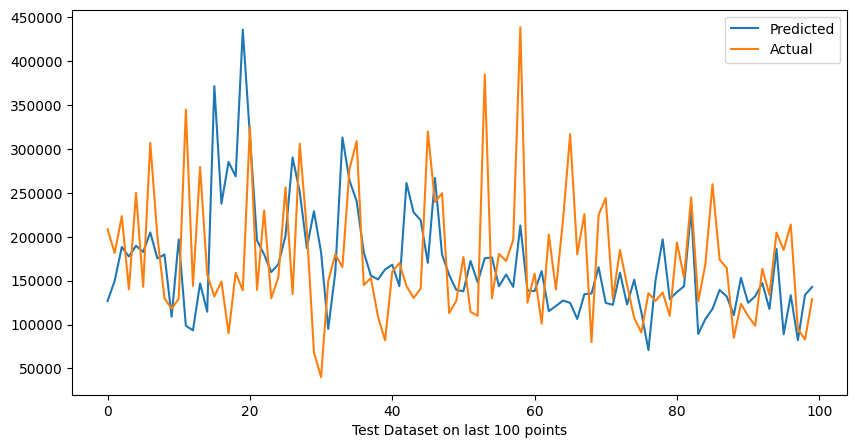

In [52]:
# Actual/Predicted on test data
plt.figure(figsize=(10,5))
plt.plot((rfrcv_test_pred)[:100])
plt.plot((Y_test)[:100])
plt.legend(["Predicted", "Actual"])
plt.xlabel('Test Dataset on last 100 points')
plt.show()

# *(G) Light GBM Regression Model*

In [53]:
# Train_Test_Split
X_train, X_test, Y_train, Y_test

# Light GBM Regressor Model
lgbmr_model = LGBMRegressor(boosting_type = "gbdt",
                            objective = 'regression',
                            metric = 'rmse',
                            num_leaves = 54,
                            learning_rate = 0.05,
                            feature_fraction = 0.9,
                            max_depth = -1,
                            )

# Fit the model
lgbmrcv_trained_model = lgbmr_model.fit(X_train, Y_train)

# Test dataset prediction
lgbmrcv_test_pred = lgbmrcv_trained_model.predict(X_test)

# Find training score
lgbmrcv_accuracy = round(lgbmrcv_trained_model.score(X_train, Y_train) * 100, 2)
print("The Accuracy of the trained model is:-", lgbmrcv_accuracy)

# Metric Result
lgbmrcv_mse = mean_squared_error(Y_test, lgbmrcv_test_pred)
print("The MSE of the model is:-", lgbmrcv_mse)

lgbmrcv_rmse = sqrt(mean_squared_error(Y_test, lgbmrcv_test_pred))
print("The RMSE of the model is:-", lgbmrcv_rmse)

lgbmrcv_mae = mean_absolute_error(Y_test, lgbmrcv_test_pred)
print("The MAE of the model is:-", lgbmrcv_mae)

lgbmrcv_r2 = r2_score(Y_test, lgbmrcv_test_pred)
print("The R2 of the model is:-", lgbmrcv_r2)

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001017 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1962
[LightGBM] [Info] Number of data points in the train set: 1460, number of used features: 53
[LightGBM] [Info] Start training from score 180921.195890
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wit

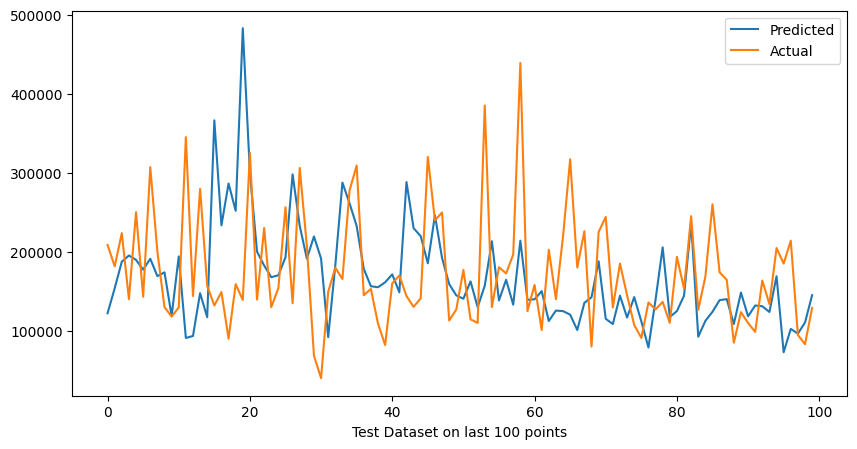

In [54]:
# Actual/Predicted on test data
plt.figure(figsize=(10,5))
plt.plot((lgbmrcv_test_pred)[:100])
plt.plot((Y_test)[:100])
plt.legend(["Predicted", "Actual"])
plt.xlabel('Test Dataset on last 100 points')
plt.show()

# *15. Regression Model Testing*

# Light GBM Regression Model

In [55]:
# Save LGBM Regression Model
model_path = 'C:/Users/rital/python_projects/Hackathons/HousePricePredictionApp/joutput/jmodels/lgbmrcv_trained_model.joblib'
dump(lgbmrcv_trained_model, model_path)

print("Regression model saved successfully!")

Regression model saved successfully!


In [56]:
# Load the LGBMR Model
load_model_path = 'C:/Users/rital/python_projects/Hackathons/HousePricePredictionApp/joutput/jmodels/lgbmrcv_trained_model.joblib'
lgbmrcv_loaded_model = load(load_model_path)

print("Light GBM Regression Model loaded successfully!")

Light GBM Regression Model loaded successfully!


In [57]:
# Sale price prediction by LGBM Regression Model for test dataset
lgbmrcv_prediction = lgbmrcv_loaded_model.predict(X_test)
lgbmrcv_prediction

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9


array([122189.2410, 153775.2765, 187418.6210, ..., 146661.8483,
       125439.5327, 219003.3448], shape=(1459,))

In [58]:
# Display test dataset Id as index with SalePrice prediction as pandas dataframe

lgbmrcv_tested_model_prediction = pd.DataFrame({
                                    "Id": test_clean_df["Id"],
                                    "SalePrice": lgbmrcv_prediction
                                    })

lgbmrcv_tested_model_prediction.to_csv('C:/Users/rital/python_projects/Hackathons/HousePricePredictionApp/joutput/jmodels/kglhpplgbmrcvrm_submission.csv', float_format='%.4f', index=False)
lgbmrcv_tested_model_prediction.head()

Id    SalePrice
0  1461  122189.2410
1  1462  153775.2765
2  1463  187418.6210
3  1464  195240.3818
4  1465  189675.2156

![title](kglhpplgbmrcvm_score.png)

In [59]:
# Inflated sale price prediction of LGBM Regression Model for test dataset
cpi_year = datetime.now().year - 1

cpi_prediction = cpi.inflate(lgbmrcv_prediction, 2011, items="Housing", area="U.S. city average", to=cpi_year)

cpi_prediction

array([186353.3432, 234525.8604, 285836.0223, ..., 223677.0237,
       191310.4304, 334006.5389], shape=(1459,))

In [60]:
# Display test dataset Id as index with SalePrice prediction as pandas dataframe

cpi_prediction = pd.DataFrame({
                                    "Id": test_clean_df["Id"],
                                    "SalePrice": cpi_prediction
                                    })

cpi_prediction.to_csv('C:/Users/rital/python_projects/Hackathons/HousePricePredictionApp/joutput/jmodels/cpihpplgbmrcvrm.csv', float_format='%.4f', index=False)
cpi_prediction.head()

Id    SalePrice
0  1461  186353.3432
1  1462  234525.8604
2  1463  285836.0223
3  1464  297765.1517
4  1465  289277.6014

# *16. Comparison Of Regression Models On Sample Data*

In [61]:
# Test all regression models on sample data
input_data = (20,2,3,0,4,12,0,2,1,0,10,12,3,1,3,882,0,4,1,3,896,0,896,1,0,2,1,3,6,5,1,2,3,4,2,2,0,8,
                4,49,49,49,612,0,2,140,120,5.5,1.5,1.5,1.5,3.5,3,3.5)

input_data_array = np.asarray(input_data).reshape(1, -1)

# Linear Regression Model
prediction_1 = lr_model.predict(input_data_array)
y_test_pred_1 = prediction_1
print("Linear Regression Model Sale Price :-", y_test_pred_1)

# Ridge Regression Model
prediction_2 = rr_model.predict(input_data_array)
y_test_pred_2 = prediction_2
print("Ridge Regression Model Sale Price :-", y_test_pred_2)

# Support Vector Regression Model
prediction_3 = svmr_model.predict(input_data_array)
y_test_pred_3 = prediction_3
print("Support Vector Regression Model Sale Price :-", y_test_pred_3)

# Logistic Regression Model
prediction_4 = logreg_model.predict(input_data_array)
y_test_pred_4 = prediction_4
print("Logistic Regression Model Sale Price :-", y_test_pred_4)

# Xtreme Gradient Boosting Regression Model
prediction_5 = xgbr_model.predict(input_data_array)
y_test_pred_5 = prediction_5
print("Xtreme Gradient Boosting Regression Model Sale Price :-", y_test_pred_5)

# Random Forest Regression Model
prediction_6 = rfr_model.predict(input_data_array)
y_test_pred_6 = prediction_6
print("Random Forest Regression Model Sale Price :-", y_test_pred_6)

# Light Gradient Boosting Machine Regression Model
prediction_7 = lgbmr_model.predict(input_data_array)
y_test_pred_7 = prediction_7
print("Light Gradient Boosting Machine Regression Model Sale Price :-", y_test_pred_7)

Linear Regression Model Sale Price :- [31965416.7416]
Ridge Regression Model Sale Price :- [28859203.0848]
Support Vector Regression Model Sale Price :- [29626305.1032]
Logistic Regression Model Sale Price :- [200000]
Xtreme Gradient Boosting Regression Model Sale Price :- [309155.9062]
Random Forest Regression Model Sale Price :- [439662.7433]
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
Light Gradient Boosting Machine Regression Model Sale Price :- [324556.3802]


In [62]:
# Inflated house sale price prediction for all regression models on sample data
# Linear Regression Model
cpi_prediction_1 = cpi.inflate(prediction_1, 2011, items="Housing", area="U.S. city average", to=cpi_year)
print("Inflated Linear Regression Model Sale Price :-", cpi_prediction_1)

# Ridge Regression Model
cpi_prediction_2 = cpi.inflate(prediction_2, 2011, items="Housing", area="U.S. city average", to=cpi_year)
print("Inflated Ridge Regression Model Sale Price :-", cpi_prediction_2)

# Support Vector Regression Model
cpi_prediction_3 = cpi.inflate(prediction_3, 2011, items="Housing", area="U.S. city average", to=cpi_year)
print("Inflated Support Vector Regression Model Sale Price :-", cpi_prediction_3)

# Logistic Regression Model
cpi_prediction_4 = cpi.inflate(prediction_4, 2011, items="Housing", area="U.S. city average", to=cpi_year)
print("Inflated Logistic Regression Model Sale Price :-", cpi_prediction_4)

# Xtreme Gradient Boosting Regression Model
cpi_prediction_5 = cpi.inflate(prediction_5, 2011, items="Housing", area="U.S. city average", to=cpi_year)
print("Inflated Xtreme Gradient Boosting Regression Model Sale Price :-", cpi_prediction_5)

# Random Forest Regression Model
cpi_prediction_6 = cpi.inflate(prediction_6, 2011, items="Housing", area="U.S. city average", to=cpi_year)
print("Inflated Random Forest Regression Model Sale Price :-", cpi_prediction_6)

# Light Gradient Boosting Machine Regression Model
cpi_prediction_7 = cpi.inflate(prediction_7, 2011, items="Housing", area="U.S. city average", to=cpi_year)
print("Inflated Light Gradient Boosting Machine Regression Model Sale Price :-", cpi_prediction_7)

Inflated Linear Regression Model Sale Price :- [48751119.3969]
Inflated Ridge Regression Model Sale Price :- [44013768.5881]
Inflated Support Vector Regression Model Sale Price :- [45183691.7707]
Inflated Logistic Regression Model Sale Price :- [305024.1440]
Inflated Xtreme Gradient Boosting Regression Model Sale Price :- [471500.0938]
Inflated Random Forest Regression Model Sale Price :- [670538.7597]
Inflated Light Gradient Boosting Machine Regression Model Sale Price :- [494987.6602]
